<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_1_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.467548,80.693058,32.077449,26.299284,-0.007565,184.529774,184.539701,-0.009926
1,0.0,1.0,22.878703,99.811096,42.824786,63.356889,0.095786,238.967259,238.892543,0.074716
2,0.0,2.0,58.436214,49.454125,70.074834,74.000176,0.151268,262.116617,261.970394,0.146223
3,0.0,3.0,27.776174,65.983540,42.246284,81.855474,0.036516,227.897988,227.885456,0.012532
4,0.0,4.0,81.325449,97.371490,98.689660,26.240990,-0.077327,313.550261,313.605831,-0.055570
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,94.801316,39.344185,73.638323,81.906126,0.176734,299.866684,299.699563,0.167121
59996,999.0,56.0,94.188245,57.863505,48.698546,39.048237,0.101394,249.899928,249.800495,0.099433
59997,999.0,57.0,29.968833,48.875154,94.710099,34.645057,-0.084254,218.114890,218.158858,-0.043968
59998,999.0,58.0,43.124904,58.943245,71.323614,27.719963,0.029690,211.141417,211.082291,0.059125


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    35.467548  80.693058  32.077449  26.299284 -0.007565  184.529774   
      1.0    22.878703  99.811096  42.824786  63.356889  0.095786  238.967259   
      2.0    58.436214  49.454125  70.074834  74.000176  0.151268  262.116617   
      3.0    27.776174  65.983540  42.246284  81.855474  0.036516  227.897988   
      4.0    81.325449  97.371490  98.689660  26.240990 -0.077327  313.550261   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   94.801316  39.344185  73.638323  81.906126  0.176734  299.866684   
      56.0   94.188245  57.863505  48.698546  39.048237  0.101394  249.899928   
      57.0   29.968833  48.875154  94.710099  34.645057 -0.084254  218.114890   
      58.0   43.124904  58.943245  71.323614  27.719963  0.029690  211.141417   
      59.0   87.220903  72.927819  90.471950  34.455083 -0.056067  295.019687   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    184.539701 -0.009926  
      1.0    238.892543  0.074716  
      2.0    261.970394  0.146223  
      3.0    227.885456  0.012532  
      4.0    313.605831 -0.055570  
...                 ...       ...  
999.0 55.0   299.699563  0.167121  
      56.0   249.800495  0.099433  
      57.0   218.158858 -0.043968  
      58.0   211.082291  0.059125  
      59.0   295.033049 -0.013362  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    35.467548  80.693058  32.077449  26.299284 -0.007565  184.529774   
      1.0    22.878703  99.811096  42.824786  63.356889  0.095786  238.967259   
      2.0    58.436214  49.454125  70.074834  74.000176  0.151268  262.116617   
      3.0    27.776174  65.983540  42.246284  81.855474  0.036516  227.897988   
      4.0    81.325449  97.371490  98.689660  26.240990 -0.077327  313.550261   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   94.801316  39.344185  73.638323  81.906126  0.176734  299.866684   
      56.0   94.188245  57.863505  48.698546  39.048237  0.101394  249.899928   
      57.0   29.968833  48.875154  94.710099  34.645057 -0.084254  218.114890   
      58.0   43.124904  58.943245  71.323614  27.719963  0.029690  211.141417   
      59.0   87.220903  72.927819  90.471950  34.455083 -0.056067  295.019687   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    184.539701 -0.009926  
      1.0    238.892543  0.074716  
      2.0    261.970394  0.146223  
      3.0    227.885456  0.012532  
      4.0    313.605831 -0.055570  
...                 ...       ...  
999.0 55.0   299.699563  0.167121  
      56.0   249.800495  0.099433  
      57.0   218.158858 -0.043968  
      58.0   211.082291  0.059125  
      59.0   295.033049 -0.013362  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.467548,80.693058,32.077449,26.299284,-0.007565,184.529774,184.539701,-0.009926
1,0.0,1.0,22.878703,99.811096,42.824786,63.356889,0.095786,238.967259,238.892543,0.074716
2,0.0,2.0,58.436214,49.454125,70.074834,74.000176,0.151268,262.116617,261.970394,0.146223
3,0.0,3.0,27.776174,65.983540,42.246284,81.855474,0.036516,227.897988,227.885456,0.012532
4,0.0,4.0,81.325449,97.371490,98.689660,26.240990,-0.077327,313.550261,313.605831,-0.055570
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,94.801316,39.344185,73.638323,81.906126,0.176734,299.866684,299.699563,0.167121
59996,999.0,56.0,94.188245,57.863505,48.698546,39.048237,0.101394,249.899928,249.800495,0.099433
59997,999.0,57.0,29.968833,48.875154,94.710099,34.645057,-0.084254,218.114890,218.158858,-0.043968
59998,999.0,58.0,43.124904,58.943245,71.323614,27.719963,0.029690,211.141417,211.082291,0.059125


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    35.467548  80.693058  32.077449  26.299284 -0.007565  184.529774   
      1.0    22.878703  99.811096  42.824786  63.356889  0.095786  238.967259   
      2.0    58.436214  49.454125  70.074834  74.000176  0.151268  262.116617   
      3.0    27.776174  65.983540  42.246284  81.855474  0.036516  227.897988   
      4.0    81.325449  97.371490  98.689660  26.240990 -0.077327  313.550261   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   94.801316  39.344185  73.638323  81.906126  0.176734  299.866684   
      56.0   94.188245  57.863505  48.698546  39.048237  0.101394  249.899928   
      57.0   29.968833  48.875154  94.710099  34.645057 -0.084254  218.114890   
      58.0   43.124904  58.943245  71.323614  27.719963  0.029690  211.141417   
      59.0   87.220903  72.927819  90.471950  34.455083 -0.056067  295.019687   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    184.539701 -0.009926  
      1.0    238.892543  0.074716  
      2.0    261.970394  0.146223  
      3.0    227.885456  0.012532  
      4.0    313.605831 -0.055570  
...                 ...       ...  
999.0 55.0   299.699563  0.167121  
      56.0   249.800495  0.099433  
      57.0   218.158858 -0.043968  
      58.0   211.082291  0.059125  
      59.0   295.033049 -0.013362  

[60000 rows x 8 columns]

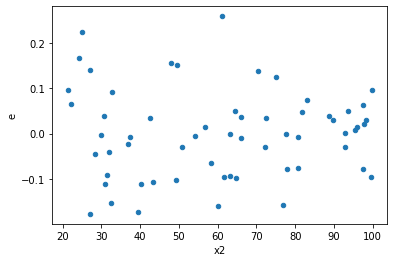

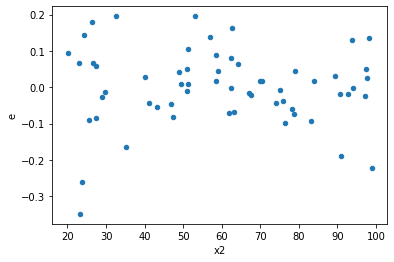

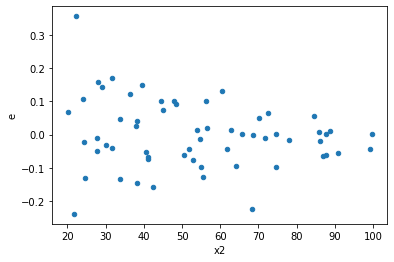

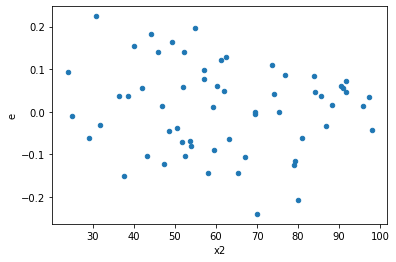

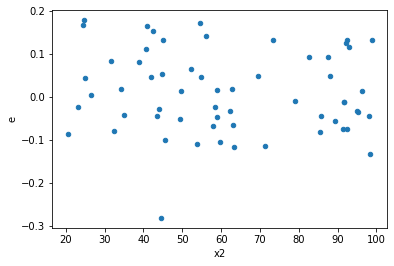

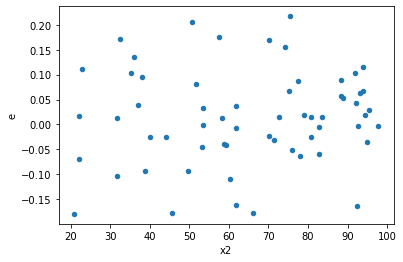

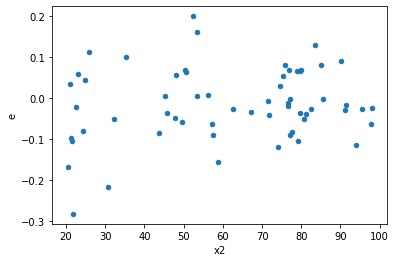

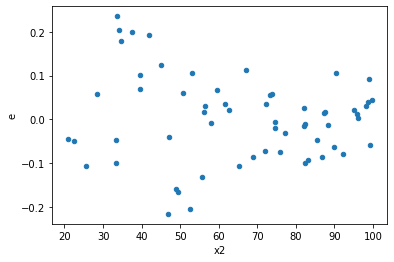

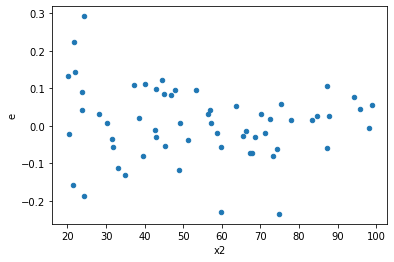

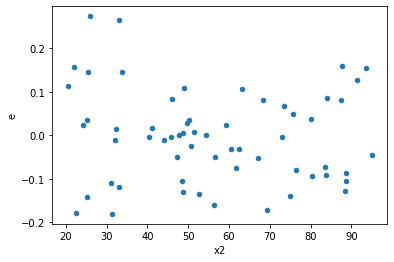

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,26.0,26.0,0.12866777373141,0.40715848929087567,0.004948760528131154,0.01565994189580291,3.16441699023103,0.004587330256292876,0.9977063348718536,0.002293665128146438,Reject001=0 : Heteroscedasticity
1.0,21.0,31.0,0.11023887250971051,0.44848958454930904,0.005249470119510024,0.014467405953203517,2.7559745314930715,0.010269371629922919,0.9948653141850385,0.005134685814961459,Reject001=1 : Homoscedasticity
2.0,28.0,24.0,0.2453687039624914,0.2787307707963625,0.008763167998660408,0.011613782116515104,1.3252949296750283,0.4869164711699303,0.7565417644150348,0.24345823558496515,Reject001=1 : Homoscedasticity
4.0,21.0,31.0,0.14727130898974292,0.3503574948254129,0.007012919475702044,0.011301854671787513,1.6115762787446115,0.2221645966842698,0.8889177016578651,0.1110822983421349,Reject001=1 : Homoscedasticity
10.0,24.0,28.0,0.15027309567966227,0.22271738622725012,0.006261378986652594,0.007954192365258933,1.270357916716895,0.5393952166840621,0.730302391657969,0.26969760834203105,Reject001=1 : Homoscedasticity
11.0,18.0,34.0,0.15995226081646538,0.35359340440123055,0.008886236712025854,0.010399806011800898,1.1703273667835916,0.6721986487989637,0.6639006756005181,0.33609932439948187,Reject001=1 : Homoscedasticity
12.0,23.0,29.0,0.1132875391562266,0.208333471068289,0.004925545180705504,0.007183912795458242,1.4585010454475749,0.3340696926150526,0.8329651536924737,0.1670348463075263,Reject001=1 : Homoscedasticity
14.0,18.0,34.0,0.11933291637444449,0.22445920192164023,0.006629606465246916,0.006601741232989419,0.9957968497219903,0.9741428450193557,0.5129285774903222,0.48707142250967783,Reject001=1 : Homoscedasticity
15.0,21.0,31.0,0.15088593946703785,0.32675814128481623,0.007185044736525612,0.010540585202736007,1.4670173379926643,0.3250493402840351,0.8374753298579825,0.16252467014201755,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,26.0,26.0,0.12866777373141,0.40715848929087567,0.004948760528131154,0.01565994189580291,3.16441699023103,0.004587330256292876,Reject001=0 : Heteroscedasticity
1.0,21.0,31.0,0.11023887250971051,0.44848958454930904,0.005249470119510024,0.014467405953203517,2.7559745314930715,0.010269371629922919,Reject001=1 : Homoscedasticity
2.0,28.0,24.0,0.2453687039624914,0.2787307707963625,0.008763167998660408,0.011613782116515104,1.3252949296750283,0.4869164711699303,Reject001=1 : Homoscedasticity
3.0,23.0,29.0,0.2737302339409991,0.24057107207009906,0.011901314519173874,0.008295554209313761,0.6970283993376553,0.37807737650717965,Reject001=1 : Homoscedasticity
4.0,21.0,31.0,0.14727130898974292,0.3503574948254129,0.007012919475702044,0.011301854671787513,1.6115762787446115,0.2221645966842698,Reject001=1 : Homoscedasticity
5.0,22.0,30.0,0.2553977869708274,0.1539549653606065,0.01160899031685579,0.005131832178686883,0.44205671971624166,0.051163903916071035,Reject001=1 : Homoscedasticity
6.0,30.0,22.0,0.3245198435157092,0.08110557017879273,0.010817328117190307,0.0036866168263087608,0.3408066008879023,0.006596006889022935,Reject001=0 : Heteroscedasticity
7.0,18.0,34.0,0.3060614423283272,0.17564600348108644,0.017003413462684844,0.005166058925914307,0.30382481360296143,0.009382546025729277,Reject001=0 : Heteroscedasticity
8.0,32.0,20.0,0.34713493382266486,0.1579915408331371,0.010847966681958277,0.007899577041656855,0.7282080848197094,0.4132089989432806,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      865
Reject001=0 : Heteroscedasticity    135
Name: Result_test, dtype: int64